# Distances

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium

In [9]:
df = pd.read_csv('../data/ru_lat_lng_clear_v2.csv')

In [10]:
df.head(2)

,name,country,subcountry,geonameid,lat,lng
0,Yoshkar-Ola,Russia,Mariy-El,466806,56.631595,47.886178
1,Yaroslavl,Russia,Jaroslavl,468902,57.626578,39.893858


[great circle distance](https://en.wikipedia.org/wiki/Great-circle_distance)

In [11]:
import math
from math import cos, sin, sqrt, atan
def angleDist(lat1, lng1, lat2, lng2):
    lat1 = math.radians(lat1)
    lng1 = math.radians(lng1)
    lat2 = math.radians(lat2)
    lng2 = math.radians(lng2)
    phi1 = lat1
    phi2 = lat2
    dl = (lng1 - lng2)
    n = (sqrt((cos(phi2)*sin(dl))**2
             +(cos(phi1)*sin(phi1)-sin(phi1)*cos(phi2)*cos(dl))**2))
    d = sin(phi1)*sin(phi2)+cos(phi1)*cos(phi2)*cos(dl)
    sigma = atan(n/d)
    
    return sigma

Add ang dist?

In [12]:
mat = pd.crosstab(df['name'], df['name']).astype(float)

In [13]:
for i in range(df.shape[0]):
    for j in range(i + 1, df.shape[0]):
        r1 = df.iloc[i]
        r2 = df.iloc[j]
        dist = angleDist(r1['lat'], r1['lng'], r2['lat'], r2['lng'])
        mat[r1['name']][r2['name']] = dist
        mat[r2['name']][r1['name']] = dist

In [14]:
mat.to_csv('../data/ru_dist_mat_v2.csv')

In [15]:
mat_cpy = mat.copy()

# Dropping large distances

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium

In [17]:
mat = pd.read_csv('../data/ru_dist_mat_v2.csv', index_col='name')

In [18]:
mat.shape

(80, 80)

In [19]:
dist_vals = pd.Series(mat.values.ravel())

In [20]:
dist_vals.shape

(6400,)

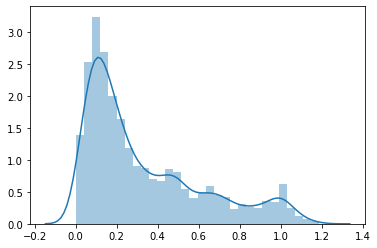

In [21]:
sns.distplot(dist_vals);

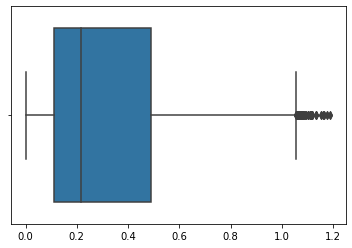

In [22]:
sns.boxplot(dist_vals);

In [23]:
q = dist_vals.quantile(0.80)
print(q)

0.5671884640526746


In [24]:
dist_q = dist_vals[dist_vals < q]

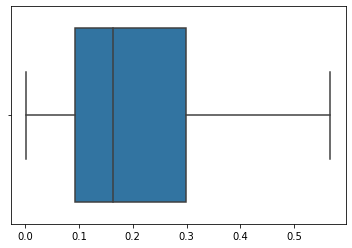

In [25]:
sns.boxplot(dist_q);

In [26]:
dist_q.shape

(5120,)

In [27]:
dist_4 = dist_vals[dist_vals < 0.4]

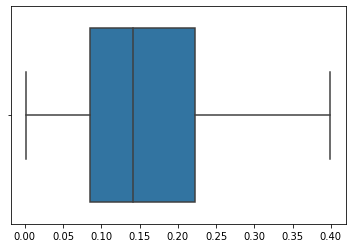

In [28]:
sns.boxplot(dist_4);

In [29]:
dist_4.shape

(4362,)

### Removing edges

In [30]:
mat_cpy = mat.copy()

In [31]:
mat = mat_cpy

In [32]:
for i in range(mat.shape[0]):
    for j in range(i + 1, mat.shape[0]):
        r = mat.iloc[i, j]
        if (r >= q):
            mat.iloc[i, j] = -1

In [33]:
mat.to_csv('../data/ru_dist_mat_v2.csv')